## **Team Enigma2**

## Invoice Processing

# Installing Packages


In [ ]:
#installing packages
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install seqeval

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,776 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importing Package

In [ ]:
from google.colab import drive
import os, zipfile
import matplotlib.pyplot as plt
import matplotlib.image as image
from os import walk
import json


import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from keras import backend as K
from keras.models import Model, Input
from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda
sess = tf.Session()
K.set_session(sess)


import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

import csv
from matplotlib.pyplot import imshow


In [ ]:
#Mount Drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
#Make Data directory
os.mkdir('/content/data')

# Data Extraction and preprocessing

## Extracting and saving file in Colab from Drive

In [ ]:
#Unzip Data from Drive
dir_name = '/content/drive/MyDrive'
extension = ".zip"
extract = '/content/data'

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = dir_name + "/" + item
        print(file_name)
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(extract) # extract file to dir
        zip_ref.close() # close file


/content/drive/MyDrive/0325updated.task1train(626p)-20210326T103949Z-001.zip
/content/drive/MyDrive/0325updated.task2train(626p)-20210326T105404Z-001.zip
/content/drive/MyDrive/task1&2_test(361p)-20210326T105314Z-001.zip
/content/drive/MyDrive/text.task1&2-test（361p)-20210326T110755Z-001.zip
/content/drive/MyDrive/task3-test 347p) --20210326T110942Z-001.zip


In [ ]:
drive.flush_and_unmount()

## Get list of Images and Annotation in a directory


In [ ]:
#Get list of Images and Annotation in a directory
def getImageAnn(mypath):
  image = []
  ann = []
  files = []
  for (dirpath, dirnames, filenames) in walk(mypath):
      files.extend(filenames)
  for i in filenames:
    if i.endswith(".jpg"):
      image.append(i)
    else:
      ann.append(i)
  return image,ann
dir_name = '/content/drive/MyDrive'
extension = ".zip"
extract = '/content/data'


In [ ]:
#Getting images and annotations for Task1 and Task2
trainDir = '/content/data/0325updated.task1train(626p)/'
trainDir2 = '/content/data/0325updated.task2train(626p)'
trainImages,trainAnn = getImageAnn(trainDir)
print(trainImages)
print(trainAnn)


trainImages2,trainAnn2 = getImageAnn(trainDir2)
print(trainImages2)
print(trainAnn2)

trainImgName =  [x[:len(x)-4] for x in trainImages]
trainAnnName =  [x[:len(x)-4] for x in trainAnn]

trainImgName2 =  [x[:len(x)-4] for x in trainImages2]
trainAnnName2 =  [x[:len(x)-4] for x in trainAnn2]

sImg = set(trainImgName)
sAnn = set(trainAnnName)
print(len(sImg),len(sAnn))


sImg2 = set(trainImgName2)
sAnn2 = set(trainAnnName2)
print(len(sImg2),len(sAnn2))

images = [] 
ann = [] 

data = list(sImg&sAnn)
for i in range(len(data)):
  images.append(data[i]+'.jpg')
  ann.append(data[i]+'.txt')


print(images[0],ann[0])
common_ann = list(sAnn & sAnn2)

x_dir = "/content/data/0325updated.task1train(626p)"
y_dir = "/content/data/0325updated.task2train(626p)"

['X51006619854.jpg', 'X51005719896.jpg', 'X51005361950.jpg', 'X51005442327.jpg', 'X51005442378.jpg', 'X51007103681(1).jpg', 'X51006388082.jpg', 'X51007846393.jpg', 'X51006620187.jpg', 'X51005361950(1).jpg', 'X51005889296.jpg', 'X51006414483.jpg', 'X51006555806.jpg', 'X51005361907.jpg', 'X51005447840.jpg', 'X51008142058.jpg', 'X51006387847.jpg', 'X51008145450.jpg', 'X51007846326.jpg', 'X51006466056.jpg', 'X51007339117.jpg', 'X51006557188.jpg', 'X51008164524.jpg', 'X51005568899.jpg', 'X51006857265.jpg', 'X51008142061.jpg', 'X51005663293.jpg', 'X51005568829.jpg', 'X51008099083.jpg', 'X51006557508.jpg', 'X51006502533.jpg', 'X51007339098.jpg', 'X51006387850.jpg', 'X51006414721.jpg', 'X00016469672.jpg', 'X51005303661.jpg', 'X51005442397.jpg', 'X51006414714.jpg', 'X51005757199.jpg', 'X51005749905.jpg', 'X51006388044.jpg', 'X51006556840.jpg', 'X51006867436.jpg', 'X51005719814.jpg', 'X51007103702.jpg', 'X51005361898.jpg', 'X51008099048.jpg', 'X51006556650.jpg', 'X51005719873.jpg', 'X51006557195

## Assigning TAGS to each word

In [ ]:
#Declare tags as per our Data
tags = ["B-COMP","I-COMP","B-ADD","I-ADD","B-TOT","O","B-DATE","I-DATE"]

In [ ]:
#convert a file of annotation in to a string of labels
def getLines(file_path):
  f = open(file_path, "r")
  lines = []
  for x in f:
    line = x.split(",")
    line = line[8:]
    line = "".join(line)
    line = line.strip()
    #line = " ".join(line)
    lines.append(line)
  lines = " ".join(lines)
  return lines


In [ ]:
#Convert the txt file containing JSON into JSON format
def getJSON(file_path):
  f = open(file_path, "r")
  lines = []
  for x in f:
    line = x.strip()
    lines.append(line)
  lines = " ".join(lines)
  lines_json = json.loads(lines)
  if ("company" not in lines_json.keys()):
    lines_json["company"] = ''
  if ("address" not in lines_json.keys()):
    lines_json["address"] = ''
  if ("date" not in lines_json.keys()):
    lines_json["date"] = ''
  if ("total" not in lines_json.keys()):
    lines_json["total"] = ''
  return lines_json

In [ ]:
#Assigning tag to each word of each sentence
def getTags(line,line_json):
  keys = ["company","address","total"]
  tags = ['O' for i in range(0,len(line.split()))]
  company_name = line_json["company"].replace(",","")
  company_name = company_name.split()
  address = line_json["address"]
  address = address.replace(",","")
  address = address.split()
  total = line_json["total"]
  date = line_json["date"]
  line = line.split()
  idx = -1
  if ("company" in line_json.keys() and len(company_name)>0):
    if (company_name[0] in line):
      idx = line.index(company_name[0])
    if (idx!=-1):
        tags[idx] = "B-COMP"
    for i in range(1,len(company_name)):
      idx = -1
      if (company_name[i] in line):
        idx = line.index(company_name[i])
      if (idx!=-1):
        if (tags[idx]=='O'):
          tags[idx] = "I-COMP"
        else:
          if (company_name[i] in line[idx+1:]):
            idx = line.index(company_name[i],idx+1)
            tags[idx] = "I-COMP"
  idx = -1
  if ("address" in line_json.keys() and len(address)>0):
    if (address[0] in line):
      idx = line.index(address[0])
      if (tags[idx] == 'O'):
        if (idx!=-1):
          tags[idx] = "B-ADD"
      else:
        idx = line.index(address[0],idx+1)
        tags[idx] = "B-ADD"
    for i in range(1,len(address)):
      idx = -1
      if (address[i] in line):
        idx = line.index(address[i])
      if (idx!=-1):
        if (tags[idx]== 'O'):
          tags[idx] = "I-ADD"
        else:
          if (address[i] in line[idx+1:]):
            idx = line.index(address[i],idx+1)
            tags[idx] = "I-ADD"
  total = total.split()
  idx = -1
  if(len(total)>0):
    if (total[-1] in line):
      idx = line.index(total[-1])
      tags[idx] = "B-TOT"
  date = date.split()
  if (date[0] in line):
    idx = line.index(date[0])
    tags[idx] = "B-DATE"
  for i in range(1,len(date)):
    if (date[i] in line):
      idx = line.index(date[i])
      tags[idx] = "I-DATE"
  print(line)
  print(tags)
  if ("B-COMP" not in tags and len(company_name)>0):
    idx = tags.index("I-COMP")
    tags[idx] = "B-COMP"
  if ("B-ADD" not in tags and len(address)>0):
    idx = tags.index("I-ADD")
    tags[idx] = "I-ADD"
  return tags

In [ ]:
#Assigning tags to each sentence in the data
task1_ann = []
task2_ann = []
words = []
for i in range(0,len(common_ann)):
  x_path = os.path.join(x_dir,common_ann[i]+".txt")
  task1_ann.append(getLines(x_path))
  line = task1_ann[i]
  words.extend(line.split())
  y_json = getJSON(os.path.join(y_dir,common_ann[i]+".txt"))
  print(y_json)
  print(line)
  task2_ann.append(getTags(line, y_json))
print(task1_ann[0])
print(task2_ann[0])  

{'company': 'UNIHAKKA INTERNATIONAL SDN BHD', 'date': '13 MAY 2018', 'address': '12, JALAN TAMPOI 7/4,KAWASAN PERINDUSTRIAN TAMPOI,81200 JOHOR BAHRU,JOHOR', 'total': '$8.70'}
UNIHAKKA INTERNATIONAL SDN BHD 13 MAY 2018 18:26 (867388-U) 12 JALAN TAMPOI 7/4KAWASAN PERINDUSTRIAN TAMPOI81200 JOHOR BAHRUJOHOR TAXINVOICE INVOICE # : OR18051302170332 ITEM QTY TOTAL SR I00100000037- 1 FISH + 3 VEGE $8.10 1 $8.10 SR I00100000064-ADD VEGETABLE $0.60 1 $0.60 TOTAL AMOUNT: $8.70 GST @6%: $0.49 NETT TOTAL: $8.70 PAYMENT MODE AMOUNT CASH $8.70 CHANGE $0.00 GST SUMMARY AMOUNT($) TAX($) SR = GST @6% 8.21 0.49 GST REG #000656195584 BAR WANG RICE@PERMAS JAYA (PRICE INCLUSIVE OF GST) THANK YOU & COME AGAIN! LIKE AND FOLLOW US ON FACEBOOK! FACEBOOK.COM/BARWANGRICE
['UNIHAKKA', 'INTERNATIONAL', 'SDN', 'BHD', '13', 'MAY', '2018', '18:26', '(867388-U)', '12', 'JALAN', 'TAMPOI', '7/4KAWASAN', 'PERINDUSTRIAN', 'TAMPOI81200', 'JOHOR', 'BAHRUJOHOR', 'TAXINVOICE', 'INVOICE', '#', ':', 'OR18051302170332', 'ITEM', '

In [ ]:
print(task1_ann[0])
print(task2_ann[0])

UNIHAKKA INTERNATIONAL SDN BHD 13 MAY 2018 18:26 (867388-U) 12 JALAN TAMPOI 7/4KAWASAN PERINDUSTRIAN TAMPOI81200 JOHOR BAHRUJOHOR TAXINVOICE INVOICE # : OR18051302170332 ITEM QTY TOTAL SR I00100000037- 1 FISH + 3 VEGE $8.10 1 $8.10 SR I00100000064-ADD VEGETABLE $0.60 1 $0.60 TOTAL AMOUNT: $8.70 GST @6%: $0.49 NETT TOTAL: $8.70 PAYMENT MODE AMOUNT CASH $8.70 CHANGE $0.00 GST SUMMARY AMOUNT($) TAX($) SR = GST @6% 8.21 0.49 GST REG #000656195584 BAR WANG RICE@PERMAS JAYA (PRICE INCLUSIVE OF GST) THANK YOU & COME AGAIN! LIKE AND FOLLOW US ON FACEBOOK! FACEBOOK.COM/BARWANGRICE
['B-COMP', 'I-COMP', 'I-COMP', 'I-COMP', 'B-DATE', 'I-DATE', 'I-DATE', 'O', 'O', 'B-ADD', 'I-ADD', 'I-ADD', 'I-ADD', 'I-ADD', 'I-ADD', 'I-ADD', 'I-ADD', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-TOT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

In [ ]:
print(len(task1_ann))

716


In [ ]:
#Total non unique words
print(len(words))

83641


# Prepairing data for Model

In [ ]:
#Assign tags and declare variables for padding
tags = ["B-COMP","I-COMP","B-ADD","I-ADD","B-TOT","B-DATE","I-DATE","O"]
tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0

In [ ]:
#Perform Padding
from keras.preprocessing.sequence import pad_sequences
X = []
x_max_len = 0

for i in task1_ann:
  sentence = []
  for j in i.split():
    sentence.append(j)
  x_max_len = max(x_max_len,len(sentence))
  X.append(sentence)

new_X = []
for seq in X:
    new_seq = []
    for i in range(x_max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    new_X.append(new_seq)

In [ ]:
print(new_X[0])

['UNIHAKKA', 'INTERNATIONAL', 'SDN', 'BHD', '13', 'MAY', '2018', '18:26', '(867388-U)', '12', 'JALAN', 'TAMPOI', '7/4KAWASAN', 'PERINDUSTRIAN', 'TAMPOI81200', 'JOHOR', 'BAHRUJOHOR', 'TAXINVOICE', 'INVOICE', '#', ':', 'OR18051302170332', 'ITEM', 'QTY', 'TOTAL', 'SR', 'I00100000037-', '1', 'FISH', '+', '3', 'VEGE', '$8.10', '1', '$8.10', 'SR', 'I00100000064-ADD', 'VEGETABLE', '$0.60', '1', '$0.60', 'TOTAL', 'AMOUNT:', '$8.70', 'GST', '@6%:', '$0.49', 'NETT', 'TOTAL:', '$8.70', 'PAYMENT', 'MODE', 'AMOUNT', 'CASH', '$8.70', 'CHANGE', '$0.00', 'GST', 'SUMMARY', 'AMOUNT($)', 'TAX($)', 'SR', '=', 'GST', '@6%', '8.21', '0.49', 'GST', 'REG', '#000656195584', 'BAR', 'WANG', 'RICE@PERMAS', 'JAYA', '(PRICE', 'INCLUSIVE', 'OF', 'GST)', 'THANK', 'YOU', '&', 'COME', 'AGAIN!', 'LIKE', 'AND', 'FOLLOW', 'US', 'ON', 'FACEBOOK!', 'FACEBOOK.COM/BARWANGRICE', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADwor

In [ ]:
#Padding on Y
y = []
y_max_len = 0
for i in task2_ann:
  sentence = []
  for j in i:
    sentence.append(tag2idx[j])
  y_max_len = max(y_max_len,len(sentence))
  y.append(sentence)
print(y[0])

[1, 2, 2, 2, 6, 7, 7, 8, 8, 3, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


In [ ]:
y = pad_sequences(maxlen=y_max_len, sequences=y, padding="post", value=tag2idx["PAD"])

In [ ]:
print(y[0])
print(y_max_len)

[1 2 2 2 6 7 7 8 8 3 4 4 4 4 4 4 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 5 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
240


In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(new_X, y, test_size=0.1, random_state=2018)

In [ ]:
print(np.array(y_tr).shape)

(644, 240)


In [ ]:
print(np.array(X_tr).shape)

(644, 240)


# Model

In [ ]:
batch_size = 32
import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K



## Load ELMO embedding

In [ ]:
elmo_model = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [ ]:
def ElmoEmbedding(x):
    return elmo_model(inputs={
                            "tokens": tf.squeeze(tf.cast(x, tf.string)),
                            "sequence_len": tf.constant(batch_size*[x_max_len])
                      },
                      signature="tokens",
                      as_dict=True)["elmo"]

## Checking model input shapes

In [ ]:
print(np.array(y_tr).shape)

(644, 240)


In [ ]:
print(np.array(X_tr).shape)

(644, 240)


In [ ]:
print(X_tr[0])

['99', 'SPEED', 'MART', 'S/B', '(519537-X)', 'LOT', 'P.T.', '2811', 'JALAN', 'ANGSA', 'TAMAN', 'BERKELEY', '41150', 'KLANG', 'SELANGOR', '1558-TMN', 'PUSAT', 'KEPONG', 'GST', 'ID.', 'NO', ':', '000181747712', 'INVOICE', 'NO', ':', '17858/102/T0308', '07:54PM', '561781', '21-11-16', '5386', 'STAR', 'BRAND', 'GARBAGE', 'BAG', '@6', 'X', 'RM', '5.30', 'TOTAL', 'SALES', '(INCLUSIVE', 'GST)', 'RM', 'CASH', 'RM', 'CHANGE', 'RM', 'GST', 'SUMMARY', 'AMOUNT(RM)', 'TAX(RM)', 'S', '=', '6%', '30.00', '1.80', 'THANK', 'YOU.', 'PLEASE', 'COME', 'AGAIN', 'KEEP', 'THE', 'INVOICE', 'FOR', 'APPLICABLE', 'RETURNS', 'RM31.80', 'S', '31.80', '50.00', '18.20', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 'PADword', 

In [ ]:
y_tr = np.array(y_tr)
y_tr = y_tr.reshape((y_tr.shape[0], y_tr.shape[1], 1))
print(y_tr.shape)

(644, 240, 1)


## Defining the Model

In [ ]:
input_text = Input(shape=(x_max_len,), dtype=tf.string)
embedding = Lambda(ElmoEmbedding, output_shape=(x_max_len, 1024))(input_text)
x = Bidirectional(LSTM(units=512, return_sequences=True,
                       recurrent_dropout=0.2, dropout=0.2))(embedding)
x_rnn1 = Bidirectional(LSTM(units=512, return_sequences=True,
                           recurrent_dropout=0.2, dropout=0.2))(x)
x_rnn2 = Bidirectional(LSTM(units=512, return_sequences=True,
                           recurrent_dropout=0.2, dropout=0.2))(x_rnn1)
x_rnn3 = Bidirectional(LSTM(units=512, return_sequences=True,
                           recurrent_dropout=0.2, dropout=0.2))(x_rnn2)
x = add([x, x_rnn3])  # residual connection to the first biLSTM
out = TimeDistributed(Dense(9, activation="softmax"))(x)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
model = Model(input_text, out)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 240)          0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 240, 1024)    0           input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 240, 1024)    6295552     lambda_2[0][0]                   
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) (None, 240, 1024)    6295552     bidirectional_5[0][0]            
____________________________________________________________________________________________

## Loading pretrained model from Drive

In [ ]:
model.load_weights("/content/model-IV.h5")

## Training Model

In [ ]:
history = model.fit(np.array(X_tr[:640]), 
                    np.array(y_tr[:640]),
                    batch_size=32,
                    epochs=10,
                    verbose=1)

In [ ]:
plot_accuracy = [0.8714627, 0.96098816, 0.97293836, 0.9779514, 0.98128617, 0.98395544, 0.9853154, 0.98659575, 0.98739874, 0.98831016, 0.98896843, 0.98919994, 0.9897714, 0.9904876, 0.9907697, 0.9910373, 0.9913412, 0.991616, 0.9916377, 0.99199945, 0.9925926, 0.9927517, 0.99320745, 0.9933811, 0.9936126, 0.9938657, 0.99399596, 0.99397427, 0.9939526, 0.9946253, 0.99464697, 0.9949942, 0.9953125, 0.99542826, 0.99498695, 0.9956814, 0.9958767, 0.99584055, 0.9962167, 0.9962457]
plot_val_accuracy = [0.9557291865348816, 0.9656900763511658, 0.9736979007720947, 0.9782552123069763, 0.9800130128860474, 0.9815755486488342, 0.982617199420929, 0.9834635257720947, 0.9858723878860474, 0.9863932132720947, 0.9863932132720947, 0.9874349236488342, 0.988085925579071, 0.9881510138511658, 0.9883463382720947, 0.9884114861488342, 0.9885416626930237, 0.9884114861488342, 0.9885416626930237, 0.98828125, 0.9891927242279053, 0.9889973998069763, 0.989062488079071, 0.9889323115348816, 0.9896484613418579, 0.989453136920929, 0.9899088740348816, 0.9897786378860474, 0.9901692867279053, 0.9897786378860474, 0.9902994632720947, 0.9896484613418579, 0.9898437261581421, 0.9908202886581421, 0.9905598759651184, 0.9909505248069763, 0.9901041388511658, 0.9906250238418579, 0.990429699420929, 0.990429699420929]
plot_loss = [0.5194711635510126, 0.12633893224928114, 0.08836389001872805, 0.071939072261254, 0.06086011044681072, 0.05294337703122033, 0.048416436132457524, 0.0444486735181676, 0.040974041550523706, 0.03827520666850938, 0.035587935604982905, 0.03385155968781975, 0.03192136540181107, 0.03008289873186085, 0.028340920702450804, 0.02750044957631164, 0.026127887475821707, 0.025495706333054438, 0.02460803288138575, 0.024017011125882465, 0.022329799003071256, 0.021379393939342763, 0.020633384585380554, 0.020185948866936896, 0.01939966788308488, 0.018422417394402955, 0.018065948504954576, 0.018245070707052946, 0.01728724605507321, 0.015900124485294025, 0.015459185880091455, 0.015021770468188657, 0.014030404647605287, 0.014024711524446806, 0.014596461370173428, 0.013382842815998528, 0.012333984124577708, 0.012222232038362158, 0.011491343223800262, 0.011353209976934724]
plot_val_loss = [0.1694391891360283, 0.10839860513806343, 0.08586440980434418, 0.07386050000786781, 0.06528513133525848, 0.05955975688993931, 0.05588187649846077, 0.05306296981871128, 0.04700867272913456, 0.04521450400352478, 0.04367498494684696, 0.04116975888609886, 0.039668234065175056, 0.03761002793908119, 0.037033915519714355, 0.03663116134703159, 0.03665616549551487, 0.03604894317686558, 0.03459638170897961, 0.03535569831728935, 0.033523691818118095, 0.03360113687813282, 0.034787844866514206, 0.03536207973957062, 0.032799696549773216, 0.0314817950129509, 0.03244319837540388, 0.0319440932944417, 0.030817058868706226, 0.031183937564492226, 0.03128420189023018, 0.03298341855406761, 0.032546996138989925, 0.03011839371174574, 0.03125517535954714, 0.03098130412399769, 0.031603419221937656, 0.030479902401566505, 0.03291487880051136, 0.03375023975968361]

In [ ]:
plot_accuracy = [0.8714627, 0.96098816, 0.97293836, 0.9779514, 0.98128617 ]
plot_val_accuracy = [0.9557291865348816, 0.9656900763511658, 0.9736979007720947, 0.9782552123069763, 0.9800130128860474]
plot_loss = [0.5194711635510126, 0.12633893224928114, 0.12836389001872805, 0.1271939072261254, 0.126086011044681072]
plot_val_loss = [0.1694391891360283, 0.10839860513806343, 0.108586440980434418, 0.107386050000786781, 0.106528513133525848, 0.105955975688993931]

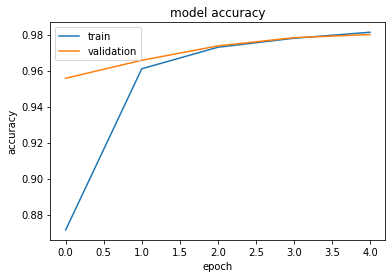

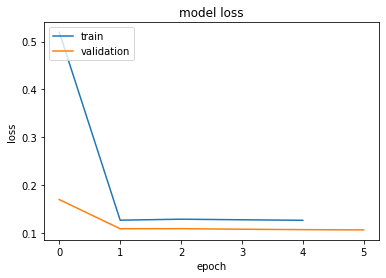

In [ ]:
#  "Accuracy"
plt.plot(plot_accuracy)
plt.plot(plot_val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(plot_loss)
plt.plot(plot_val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Testing Model

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
test_pred = model.predict(np.array(X_te[:64]), verbose=1)

64/64 [==============================] - 11s 175ms/step


# Model Prediction

In [ ]:
idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p])
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = test2label(y_te[:64])

In [ ]:
print(len(X_te))

72


In [ ]:
print(np.argmax(test_pred[0][0]))

1


In [ ]:
print(y_te[0])

[1 2 2 2 2 8 8 8 3 4 4 4 4 4 4 4 4 4 4 4 4 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 8 8 8 8 8 8 8 8
 8 8 8 8 8 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(np.argmax(test_pred[0][0]))

1


In [ ]:
print(np.argmax(test_pred[0][1]))

2


In [ ]:
print(idx2tag)

{1: 'B-COMP', 2: 'I-COMP', 3: 'B-ADD', 4: 'I-ADD', 5: 'B-TOT', 6: 'B-DATE', 7: 'I-DATE', 8: 'O', 0: 'PAD'}


In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 85.7%


/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PAD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


## Classification report

In [ ]:
print(classification_report(test_labels, pred_labels))

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PAD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


              precision    recall  f1-score   support

          AD       1.00      1.00      1.00        64
         ADD       0.71      0.61      0.65        84
        COMP       0.92      0.85      0.89        68
        DATE       0.97      0.98      0.98        61
         TOT       0.96      0.87      0.92        63

   micro avg       0.91      0.85      0.88       340
   macro avg       0.91      0.86      0.89       340
weighted avg       0.90      0.85      0.87       340



## Save model

In [ ]:
model.save_weights("model-I.h5")

## Comparing the prediction and expected result

In [ ]:
i = 0
p = model.predict(np.array(X_te[i:i+batch_size]))[0]
p = np.argmax(p, axis=-1)
print("{:15} {:5}: ({})".format("Word", "Pred", "True"))
print("="*30)
for w, true, pred in zip(X_te[i], y_te[i], p):
    if w != "PADword":
        print("{:15}:{:5} ({})".format(w, tags[pred-1], tags[true-1]))

Word            Pred : (True)
MR.            :B-COMP (B-COMP)
D.I.Y.         :I-COMP (I-COMP)
(KUCHAI)       :I-COMP (I-COMP)
SDN            :I-COMP (I-COMP)
BHD            :I-COMP (I-COMP)
LOT            :B-ADD (B-ADD)
1851-A         :I-ADD (I-ADD)
&              :I-ADD (I-ADD)
1851-B         :I-ADD (I-ADD)
JALAN          :I-ADD (I-ADD)
KPB            :I-ADD (I-ADD)
6              :I-ADD (I-ADD)
KAWASAN        :I-ADD (I-ADD)
PERINDUSTRIAN  :I-ADD (I-ADD)
BALAKONG       :I-ADD (I-ADD)
43300          :I-ADD (I-ADD)
SERI           :I-ADD (I-ADD)
KEMBANGAN      :I-ADD (I-ADD)
SELANGOR       :I-ADD (I-ADD)
(GST           :O     (O)
ID             :O     (O)
NO             :O     (O)
:000473792512) :O     (O)
(SG            :O     (O)
WANG)          :O     (O)
HANDPHONE      :O     (O)
STICKER        :O     (O)
WNY-037        :O     (O)
RC21           :O     (O)
-              :O     (O)
25/1000        :O     (O)
9086926        :O     (O)
DECO           :O     (O)
STICKER        :O     (O)


## Return the combined value of tags

In [ ]:
def predictTags(model, text, img_name):
  x_max_len = 240
  sentence = []
  for i in text.split():
    sentence.append(i)
  # print(sentence)
  new_seq = []
  for i in range(x_max_len):
      try:
          new_seq.append(sentence[i])
      except:
          new_seq.append("PADword")
  # print(new_seq)
  X_pred = [new_seq for i in range(0,32)]
  p = model.predict(np.array(X_pred[0:batch_size]))[0]
  p = np.argmax(p, axis=-1)
  # print("{:15} {:5}".format("Word", "Pred"))
  # print("="*30)
  pred_tags = []
  words = []
  for w, pred in zip(X_pred[0],p):
      if w != "PADword":
          print("{:15}:{:5}".format(w, tags[pred-1]))
          pred_tags.append(tags[pred-1])
          words.append(w)
  company_name = []
  date = []
  total = []
  address = []
  # print(words)
  count = 0
  for i in pred_tags:
    if (i == "B-COMP" or i == "I-COMP"):
      company_name.append(words[count])
    if (i == "B-ADD" or i == "I-ADD"):
      address.append(words[count])
    if (i == "B-TOT"):
      total.append(words[count])
    if (i == "B-DATE"):
      date.append(words[count])
    count = count + 1
  company_name = " ".join(company_name)
  address = " ".join(address)
  date = " ".join(date)
  total = " ".join(total)
  print("Company Name: ",company_name)
  print("Address: ", address)  
  print("Total: ",total)
  print("Date: ", date)
  result = {}
  result["Image"] = img_name
  result["Company"] = company_name
  result["Address"] = address
  result["Total"] = total
  result["Date"] = date
  with open('data.csv', 'a') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, result.keys())
    w.writerow(result)
  

In [ ]:
with open('data.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, ["Image","Company", "Address", "Total", "Date"])
    w.writeheader()


In [ ]:
sentence = "tan woo yan Thank you MRs Shop (KUCHAI) SDN BHD CO-REG:750441-W LOT 1851-A & 1851-B JALAN KPB 6 KAWASAN PERINDUSTRIAN BALAKONG 43300 SERI KEMBANGAN SELANGOR (GST ID NO :000473792512) (KEPONG) -TAX INVOICE- TISSUE HOLDER Z-66#*VS MC22-32 - 10/120 9068477 HOOK 1526# MG12/3-32/ - 36/360 9068722 PLACEMAT 145# IF31 - 20/300 9062301 FURNITURE S/MAT 2PCS 3243# MF13-22/3 - 24/360 9067630 PARTITION 1072 10CM IA12 - 12/72 4947989310729 CNY DECO A002# 26CM XE11-22 - 30 8711469 CNY DECO A003# 21CM IE21 - 60 8711468 FREE 2016 CNY RED PACKET 99292 ITEM(S) : 8 2 X 2 X 2 X 2 X 2 X 1 X 10.90 1 X 1 X *S *S *S *S *S *S *S *S QTY(S) : 13 TOTAL INCL. GST@6% CASH CHANGE GST @6% INCLUDED IN TOTAL RM 57.40 RM 100.00 RM 42.60 RM 3.25 24-01-16 11:44 SH01 B003 OPERATOR KPC - BASHUDEV NEUPANE EXCHANGE ARE ALLOWED WITHIN 3 DAY WITH RECEIPT. STRICTLY NO CASH REFUND. 5.30 10.60 2.30 4.60 1.90 3.80 2.50 5.00 7.30 14.60 10.90 7.90 7.90 0.00 0.00 T1 R000379771"
predictTags(model, sentence, "company1.jpg")

tan            :O    
woo            :O    
yan            :O    
Thank          :O    
you            :O    
MRs            :O    
Shop           :O    
(KUCHAI)       :O    
SDN            :I-COMP
BHD            :I-COMP
CO-REG:750441-W:O    
LOT            :B-ADD
1851-A         :I-ADD
&              :I-ADD
1851-B         :I-ADD
JALAN          :I-ADD
KPB            :I-ADD
6              :I-ADD
KAWASAN        :I-ADD
PERINDUSTRIAN  :I-ADD
BALAKONG       :I-ADD
43300          :I-ADD
SERI           :I-ADD
KEMBANGAN      :I-ADD
SELANGOR       :I-ADD
(GST           :O    
ID             :O    
NO             :O    
:000473792512) :O    
(KEPONG)       :O    
-TAX           :O    
INVOICE-       :O    
TISSUE         :O    
HOLDER         :O    
Z-66#*VS       :O    
MC22-32        :O    
-              :O    
10/120         :O    
9068477        :O    
HOOK           :O    
1526#          :O    
MG12/3-32/     :O    
-              :O    
36/360         :O    
9068722        :O    
PLACEMAT

## Testing on Images

In [ ]:
def predictTagFromImg(image_path_in_colab, model):
  extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
  print(extractedInformation)
  sentence = extractedInformation.split()
  removed = []
  for i in range(0,len(sentence)):
    if (sentence[i][-1] == "." and i!=len(sentence)-1):
      print("yes")
      sentence[i] = sentence[i]+sentence[i+1]
      print(sentence[i])
      removed.append(sentence[i+1])
  for i in sentence:
    if (i in removed):
      sentence.remove(i)
  sentence = " ".join(sentence)
  image_name = image_path_in_colab.split("/")[-1]
  predictTags(model, sentence, image_name)



In [ ]:
predictTagFromImg("/content/InvoiceBill-1.jpg",model)

 

 

TED HENG STATIONERY & BOOKS

(001451637-M)
NO. 53, JALAN BESAR, 45600 BATANG BERJUNTAI
SELANGOR DARUL EHSAN
TEL : 03-3271 9872 FAX: 03-3271 9481
GST No. : 0006897913856

SIMPLIFIED TAX INVOICE

 

CASH

Receipt No.: CS1801/27037 Date: 23/01/2018

 

ae so, AMOUNT
TAs ITY =U, SC%
ITEM QTY UP DISC% (RMD
TP-24 5 4.32 0.00 6.60 «

~ DOUBLE SIDED TISSUE TAPE 18MM

9557546631393 5 2.08 0.00 10.38 +
~G SOFT 6ML QUICK DRY CORRECTION PEN

Total Qty. ; maldie APIs. 16.98
a>

SUB-TOTAL a) ps 1888
ToranTAx ~v ef hy 102
ROUNDING, 4M 2 x /is\ 0:00
TOTAL / 18. 00
CASH ig ZA18.00
CHANGE i 0.00
GST SUMMARY
sees i AMOUNT TAX
TAX CODE ta (RM) (RM)
SR 6.00, 16.98 1.02
TOTAL : 16.98 1.02

Note: (*) indicated The Item Sold Has Been Related
To GST (Goods & Services Tax).

GOODS SOLD ARE NOT RETURNABLE,
THANK YOU.

yes
NO.53,
yes
No.:
yes
Qty.;
yes
APIs.16.98
yes
18.00
yes
Tax).GOODS
TED            :B-COMP
HENG           :I-COMP
STATIONERY     :I-COMP
&              :I-COMP
BOOKS          :I-COMP
(0014

In [ ]:
predictTagFromImg("/content/InvoiceBill-2.jpg",model)

 

 

PASARAYA BORONG PINTAR

SDN BHD

BR No.: (124525-H)
NO 19-G&19-1&19-2 JALAN TASIK UTAMA 4
MEDAN NIAGA TASIK DAMA!

016-5498845,
GST No.:

14/03/2018 5:57:07PM

TAX INVOICE
TRN: CROO08964

COUNTER 3 CASHIER: 1
QTY UOM UNITAmt Exc. Amt Inc. GST
Price Tax Tax Code

WALL'S TOPTEN CHOCOLATE 73ML
1 WALK 1.60 1.60 1.60 ZRL

WALL'S TOPTEN CHOCOLATE 73ML

1 WALK 1 60 1.60 1.60 ZRL
MAGNUM ALMOND 90ML

1 WALK 4.50 4.50 450 ZRL

Cloud 9 plus 22g
1 WALK 0.50 0.50 0.50 ZRL

*Total Qty: 4.00 8 20
Total Includes GST 0% 8.20
Customer's Payment

Cash 20.20
Change 12.00

GST Summary Amount(RM) Tax {RM)
ZRL=0% 8.20 0.00
*Goods sold are not returnable

Thank you for shopping at PASARAYA
BORONG PINTAR SDN BHD

 

yes
Exc.Amt
yes
Inc.GST
PASARAYA       :B-COMP
BORONG         :I-COMP
PINTAR         :I-COMP
SDN            :I-COMP
BHD            :I-COMP
BR             :O    
No.:           :O    
(124525-H)     :O    
NO             :B-ADD
19-G&19-1&19-2 :I-ADD
JALAN          :I-ADD
TASIK          :I-ADD

In [ ]:
predictTagFromImg("/content/download.jpg",model)

 

Company Name:  
Address:  
Total:  
Date:  
